<a href="https://colab.research.google.com/github/mr-aditt/Deep-Learning-and-Applications/blob/main/AlexNet/AlexNet_using_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from matplotlib import pyplot as plt
import numpy as np
import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170500096/170498071 [==============================] - 4s 0us/step


1. Display the total images in the database, size of the image, no of 
classes in the database.

In [ ]:
print("x_train.shape:", x_train.shape)
print("y_train.shape: {}\n".format(y_train.shape))

print("Total images in the dataset: {}\n".format(x_train.shape[0]+x_test.shape[0]))

# Types and number of classes
print("Types of classes:", np.unique(y_train))
print("Number of classes:",len(np.unique(y_train)))

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)

Total images in the dataset: 60000

Types of classes: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


2. Display sample input and output images (at least 10 images)

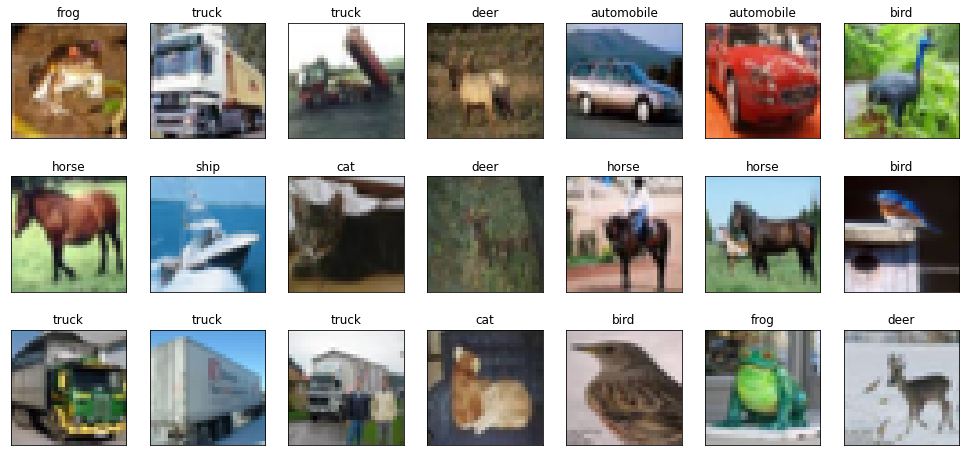

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
# Create a AlexNet and add layers
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [ ]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: 6
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_valid ,train_label, valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=13)

In [ ]:
x_train.shape,x_valid.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

AlexNet.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
rAlexNet = AlexNet.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid, valid_label))

Epoch 1/20
625/625 [==============================] - 45s 18ms/step - loss: 1.8053 - accuracy: 0.3445 - val_loss: 2.6445 - val_accuracy: 0.1905
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 1.3890 - accuracy: 0.5110 - val_loss: 1.5163 - val_accuracy: 0.4505
Epoch 3/20
625/625 [==============================] - 11s 18ms/step - loss: 1.2432 - accuracy: 0.5644 - val_loss: 1.8539 - val_accuracy: 0.4020
Epoch 4/20
625/625 [==============================] - 11s 18ms/step - loss: 1.1271 - accuracy: 0.6125 - val_loss: 1.5745 - val_accuracy: 0.4594
Epoch 5/20
625/625 [==============================] - 11s 18ms/step - loss: 1.0269 - accuracy: 0.6443 - val_loss: 1.7769 - val_accuracy: 0.4534
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 0.9328 - accuracy: 0.6779 - val_loss: 1.8034 - val_accuracy: 0.4554
Epoch 7/20
625/625 [==============================] - 11s 18ms/step - loss: 0.8275 - accuracy: 0.7218 - val_loss: 1.6430 - val_accuracy:

In [ ]:
test_eval = AlexNet.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.8181761503219604
Test accuracy: 0.5310999751091003


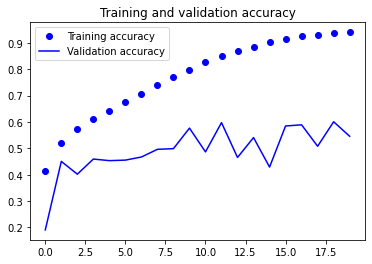

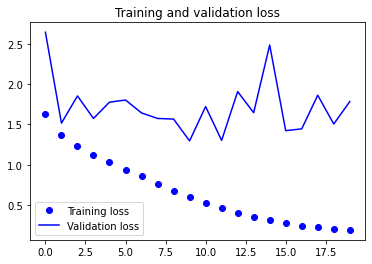

In [ ]:
accuracy = rAlexNet.history['accuracy']
val_accuracy = rAlexNet.history['val_accuracy']
loss = rAlexNet.history['loss']
val_loss = rAlexNet.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Save the trained model to a file so we can use it to make predictions later
# AlexNet.save("bird_model.h5")